<a href="https://colab.research.google.com/github/Akhilesh-va/Akhilesh-va/blob/main/New_Code_Base_Student_Grade_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
# Import all required Keras layers, including LSTM
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten

In [3]:
data = pd.read_csv('/content/drive/MyDrive/student-mat.csv')
print("Dataset Shape:", data.shape)

Dataset Shape: (395, 33)


In [4]:
print("Any Missing Values:", data.isnull().values.any())

Any Missing Values: False


In [5]:
print("Columns:", data.columns)
print(data.head())

Columns: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6

In [6]:
print("Unique Values per Column:\n", data.nunique())

Unique Values per Column:
 school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64


In [7]:
data['GAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3

In [8]:
def define_grade(df):
    grades = []
    for row in df['GAvg']:
        if row >= (0.9 * df['GAvg'].max()):
            grades.append('A')
        elif row >= (0.7 * df['GAvg'].max()):
            grades.append('B')
        else:
            grades.append('C')
    df['grades'] = grades
    return df

In [9]:
data = define_grade(data)
print("Data with Grades:\n", data.head())

Data with Grades:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  goout Dalc  Walc  health  absences  G1  G2  G3       GAvg grades  
0     4    1     1       3         6   5   6   6   5.666667      C  
1     3    1     1       3         4   5   5   6   5.333333      C  
2     2    2     3       3        10   7   8  10   8.333333      C  
3     2    1     1       5         2  15  14  15  14.666667      B  
4     2    1     2       5         4   6  10  10   8.666667      C  

[5 rows x 35 columns]


In [10]:
data.drop(["school", "age"], axis=1, inplace=True)

In [11]:
print("Descriptive Statistics:\n", data.describe())

Descriptive Statistics:
              Medu        Fedu  traveltime   studytime    failures      famrel  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     2.749367    2.521519    1.448101    2.035443    0.334177    3.944304   
std      1.094735    1.088201    0.697505    0.839240    0.743651    0.896659   
min      0.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
25%      2.000000    2.000000    1.000000    1.000000    0.000000    4.000000   
50%      3.000000    2.000000    1.000000    2.000000    0.000000    4.000000   
75%      4.000000    3.000000    2.000000    2.000000    0.000000    5.000000   
max      4.000000    4.000000    4.000000    4.000000    3.000000    5.000000   

         freetime       goout        Dalc        Walc      health    absences  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.235443    3.108861    1.481013    2.291139    3.554430    5.708861   
st

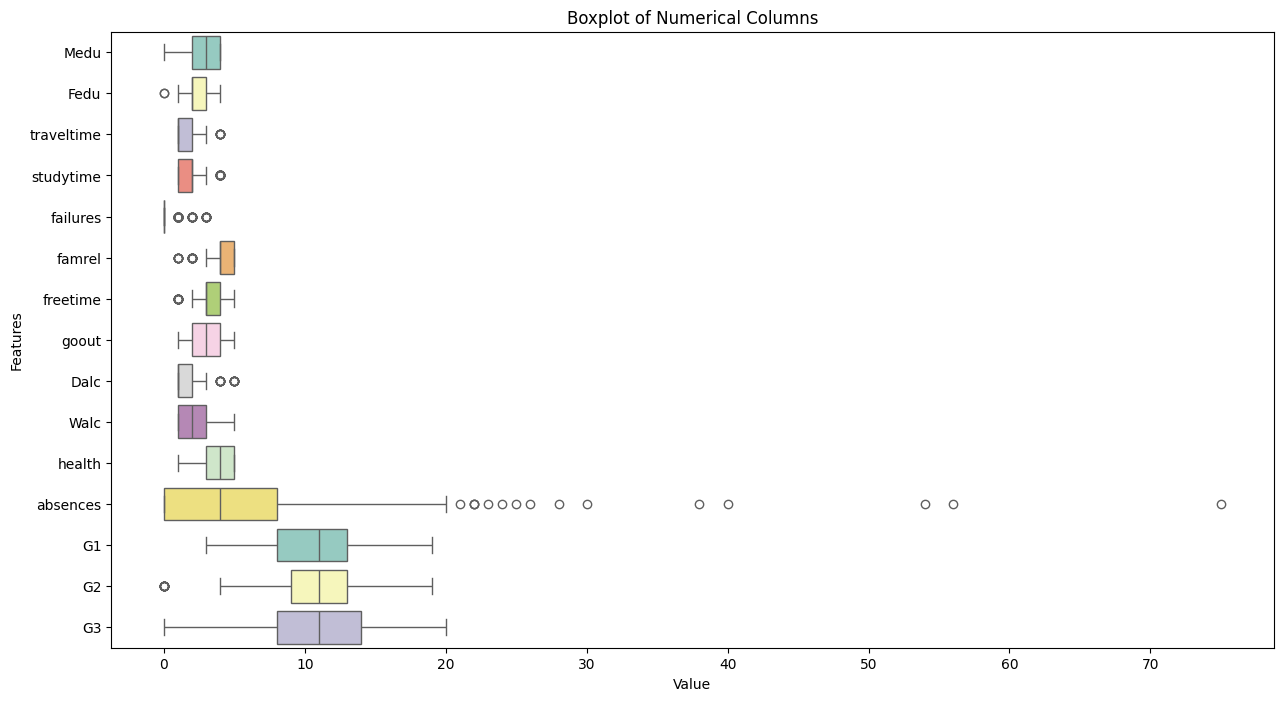

In [12]:
numerical_cols = data.select_dtypes(include='int64').columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[numerical_cols], orient='h', palette='Set3')
plt.title("Boxplot of Numerical Columns")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

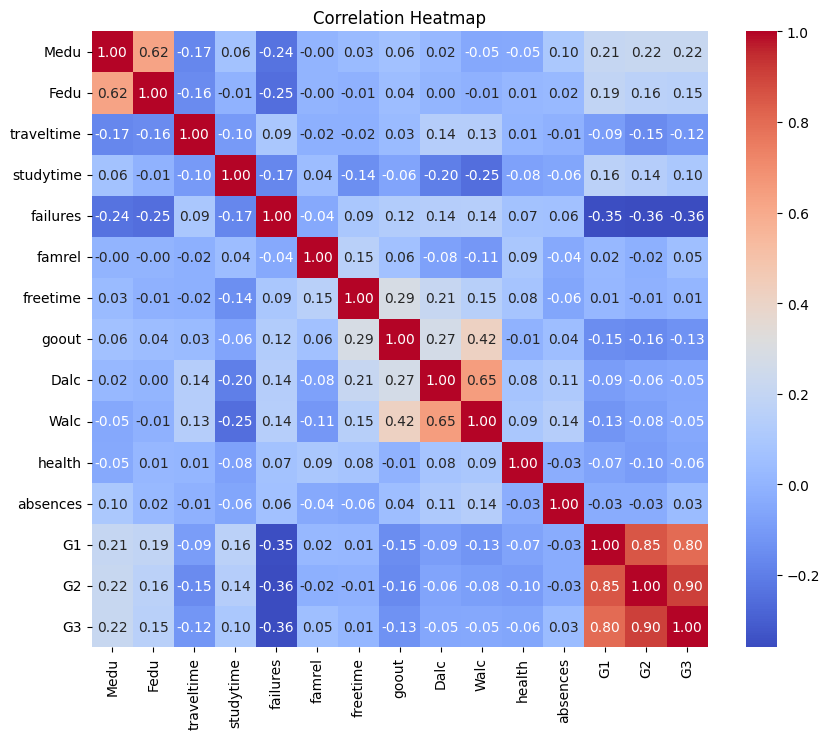

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
"""Data Preprocessing"""

d = {'yes': 1, 'no': 0}
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    data[col] = data[col].map(d)

d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)

d = {'U': 1, 'R': 0}
data['address'] = data['address'].map(d)

d = {'LE3': 1, 'GT3': 0}
data['famsize'] = data['famsize'].map(d)

d = {'T': 1, 'A': 0}
data['Pstatus'] = data['Pstatus'].map(d)

d = {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4}
data['Mjob'] = data['Mjob'].map(d)
data['Fjob'] = data['Fjob'].map(d)

d = {'home': 0, 'reputation': 1, 'course': 2, 'other': 3}
data['reason'] = data['reason'].map(d)

d = {'mother': 0, 'father': 1, 'other': 2}
data['guardian'] = data['guardian'].map(d)

d = {'C': 0, 'B': 1, 'A': 2}
data['grades'] = data['grades'].map(d)

print("Unique Values After Encoding:\n", data.nunique())

Unique Values After Encoding:
 sex            2
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
GAvg          54
grades         3
dtype: int64


In [15]:
student_features = data.columns.tolist()
student_features.remove('grades')
student_features.remove('GAvg')
student_features.remove('G1')
student_features.remove('G2')
student_features.remove('G3')
print("Selected Features for Classification:", student_features)

Selected Features for Classification: ['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [16]:
X = data[student_features].copy()
y = data[['grades']].copy()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [18]:
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=28, random_state=0)

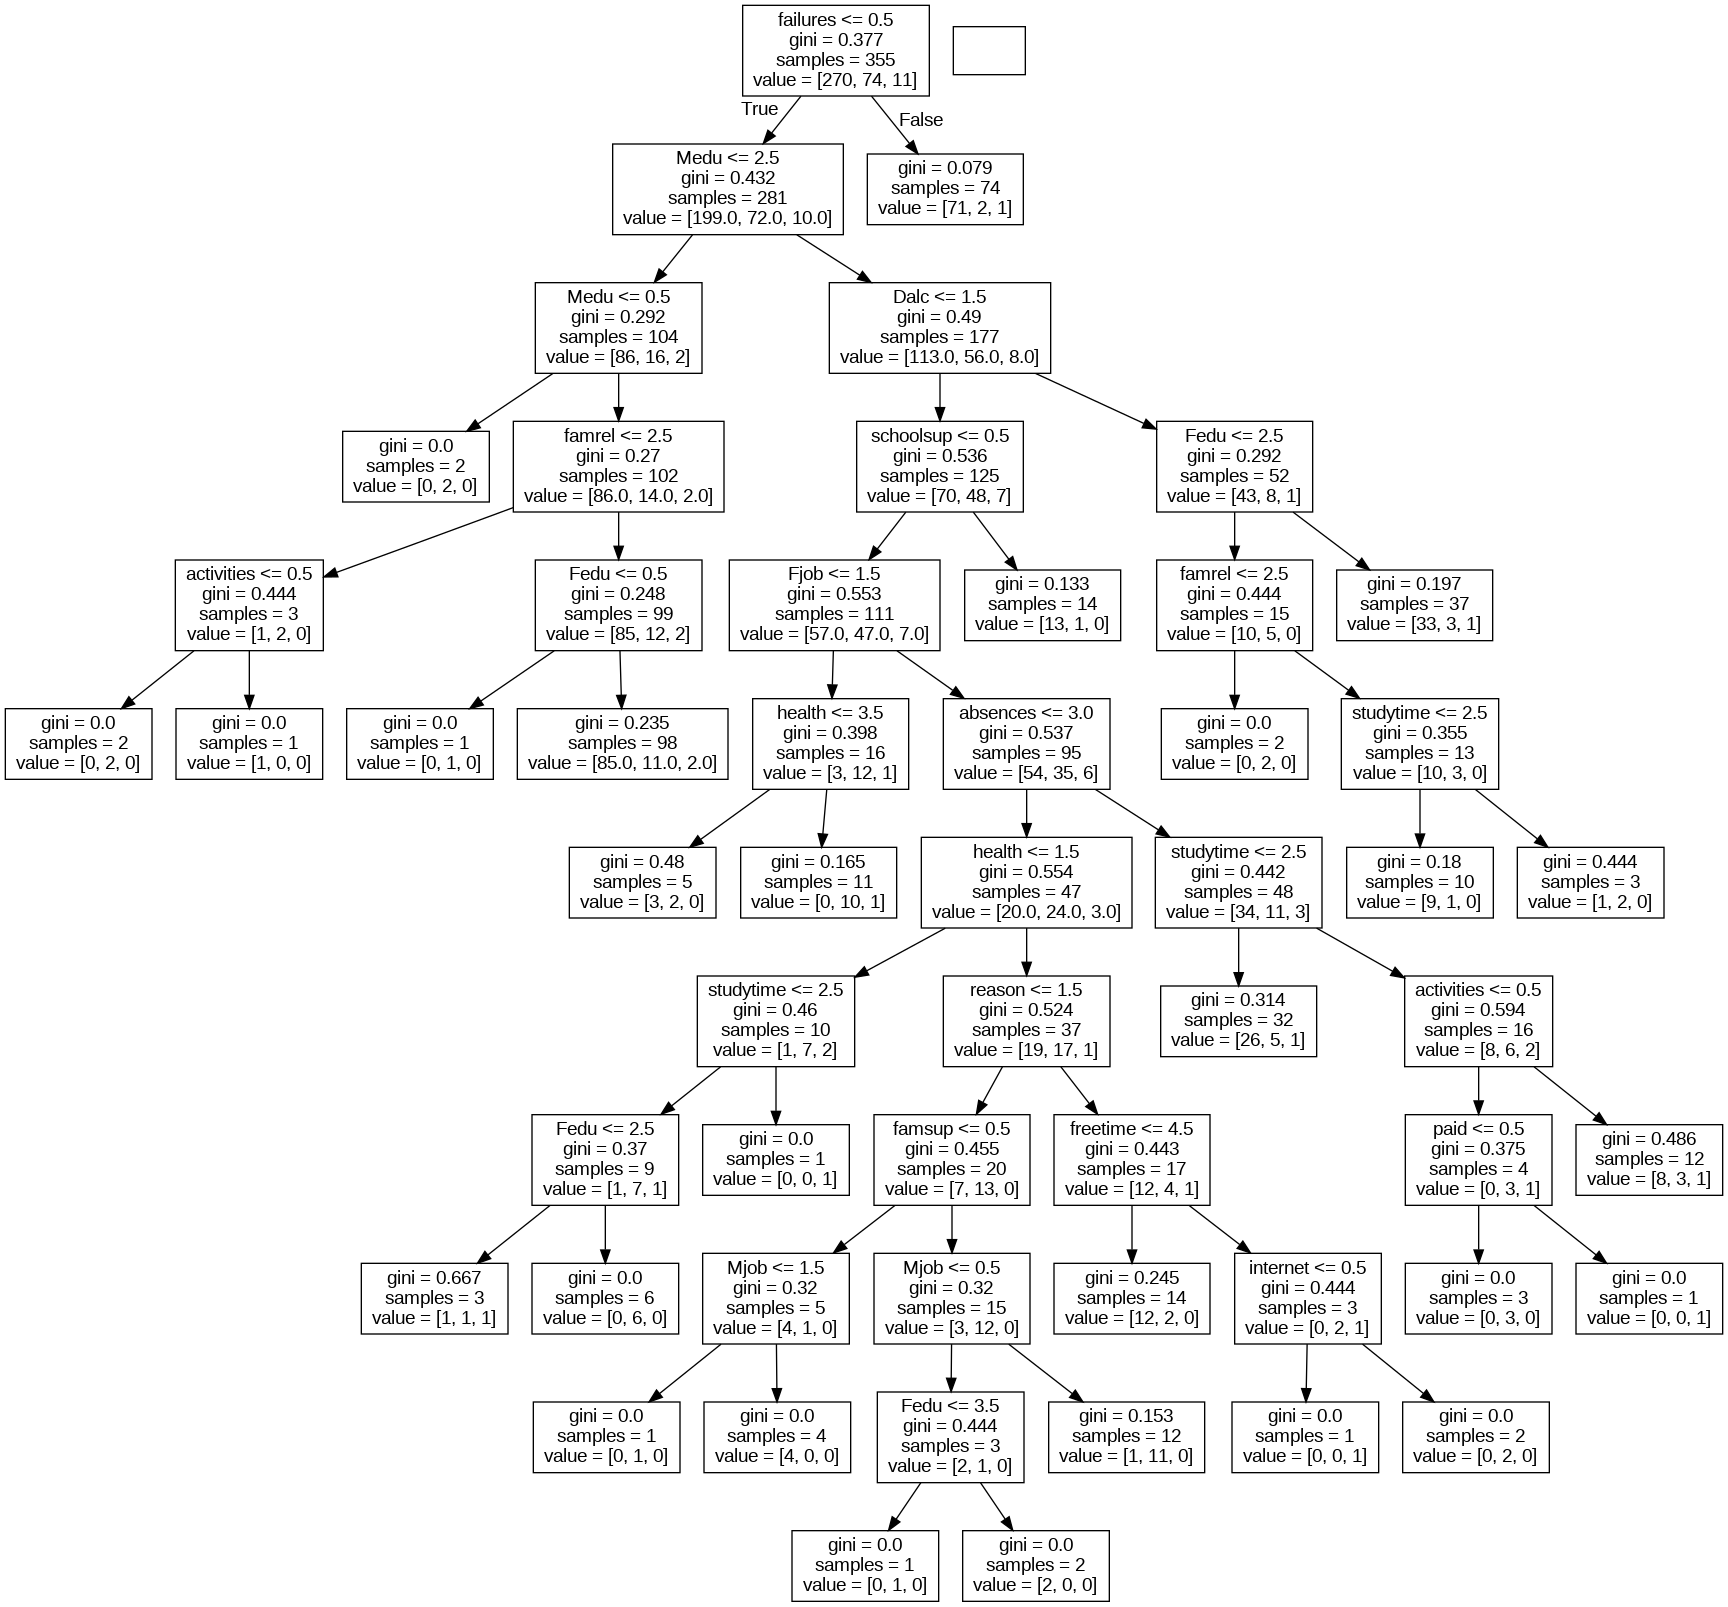

In [19]:
dot_data = StringIO()
tree.export_graphviz(grade_classifier, out_file=dot_data, feature_names=student_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
predictions = grade_classifier.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=predictions)
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")

Decision Tree Classifier Accuracy: 0.7750


**FNN**

In [21]:
X = data.drop(columns=['G3'])
y = data['G3']

In [22]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [23]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(), categorical_columns)
])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [26]:
fnn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
fnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [28]:
history = fnn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 124.6257 - mae: 10.2355 - val_loss: 106.1719 - val_mae: 9.6165
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 100.6996 - mae: 9.1945 - val_loss: 84.3691 - val_mae: 8.5703
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 74.6992 - mae: 8.0155 - val_loss: 55.7827 - val_mae: 6.9015
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 47.6651 - mae: 6.2392 - val_loss: 26.6925 - val_mae: 4.5063
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 24.5450 - mae: 4.1867 - val_loss: 14.3450 - val_mae: 2.6661
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.1565 - mae: 2.8650 - val_loss: 13.8208 - val_mae: 2.4879
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.5031 - mae: 2.8839 - val_loss: 9.1941 - val_mae: 2.0494
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6329 - mae: 2.4200 - val_loss: 8.2224 - val_mae: 2.1216
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - los

In [29]:
y_pred_fnn = fnn_model.predict(X_test)
mse_fnn = mean_squared_error(y_test, y_pred_fnn)
rmse_fnn = np.sqrt(mse_fnn)
r2_fnn = r2_score(y_test, y_pred_fnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [30]:
print(f"FNN Mean Squared Error (MSE): {mse_fnn:.4f}")
print(f"FNN Root Mean Squared Error (RMSE): {rmse_fnn:.4f}")
print(f"FNN R-squared: {r2_fnn:.4f}")

FNN Mean Squared Error (MSE): 4.9197
FNN Root Mean Squared Error (RMSE): 2.2180
FNN R-squared: 0.7601


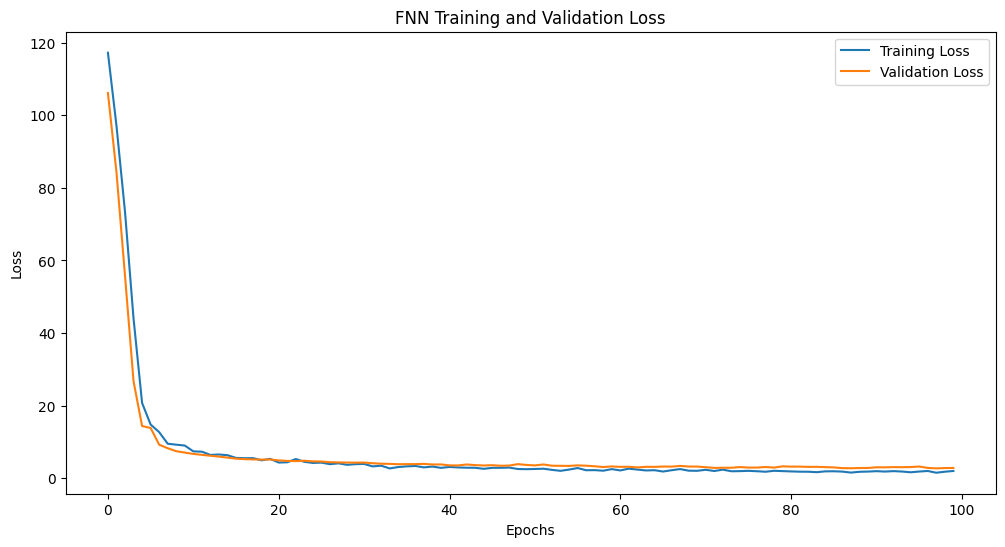

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('FNN Training and Validation Loss')
plt.show()

**DT**

In [32]:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [33]:
print(f"Decision Tree Regressor Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Decision Tree Regressor Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"Decision Tree Regressor R-squared: {r2_dt:.4f}")

Decision Tree Regressor Mean Squared Error (MSE): 0.8481
Decision Tree Regressor Root Mean Squared Error (RMSE): 0.9209
Decision Tree Regressor R-squared: 0.9586


Random **Forest**

In [34]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [35]:
X = data.drop(columns=['G3'])
y = data['G3']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [39]:
print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Random Forest Performance:
RMSE: 0.7035
R² Score: 0.9759


**LSTM**

In [40]:
X = data.drop(columns=['G3'])
y = data['G3']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [43]:
timesteps = 2  # G1 and G2 as two timesteps
features_per_timestep = X_train.shape[1] + 1

In [44]:
def create_sequences(X, y, timesteps):
    X_seq, y_seq = [], []
    for i in range(len(X)):
        # Extract G1 and G2 for the current sample
        seq = np.zeros((timesteps, features_per_timestep))
        # Add G1 and G2 as timesteps
        seq[0, 0] = data.iloc[i]['G1']  # First timestep: G1
        seq[1, 0] = data.iloc[i]['G2']  # Second timestep: G2
        # Add other features to both timesteps
        seq[:, 1:] = X[i]
        X_seq.append(seq)
        y_seq.append(y.iloc[i])
    return np.array(X_seq), np.array(y_seq)

In [45]:
X_train_seq, y_train_seq = create_sequences(X_train, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, timesteps)

In [46]:
lstm_model = Sequential([
    LSTM(64, input_shape=(timesteps, features_per_timestep), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [48]:
history_lstm = lstm_model.fit(X_train_seq, y_train_seq, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 135.3951 - mae: 10.6294 - val_loss: 125.3376 - val_mae: 10.4210
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 130.8519 - mae: 10.4202 - val_loss: 122.4646 - val_mae: 10.3063
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 124.1495 - mae: 10.2805 - val_loss: 117.7171 - val_mae: 10.1126
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 117.3006 - mae: 9.8183 - val_loss: 110.4224 - val_mae: 9.8048
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 111.6968 - mae: 9.7240 - val_loss: 99.4806 - val_mae: 9.3190
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 99.3555 - mae: 9.1495 - val_loss: 84.7702 - val_mae: 8.6112
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.2863 - mae: 8.4020 - val_loss: 67.9874 - val_mae: 7.7014
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 69.2853 - mae: 7.6224 - val_loss: 51.9662 - val_mae: 6.6812
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

In [49]:
y_pred_lstm = lstm_model.predict(X_test_seq)
mse_lstm = mean_squared_error(y_test_seq, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_seq, y_pred_lstm)

print(f"LSTM Mean Squared Error (MSE): {mse_lstm:.4f}")
print(f"LSTM Root Mean Squared Error (RMSE): {rmse_lstm:.4f}")
print(f"LSTM R-squared: {r2_lstm:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
LSTM Mean Squared Error (MSE): 4.3307
LSTM Root Mean Squared Error (RMSE): 2.0810
LSTM R-squared: 0.7888


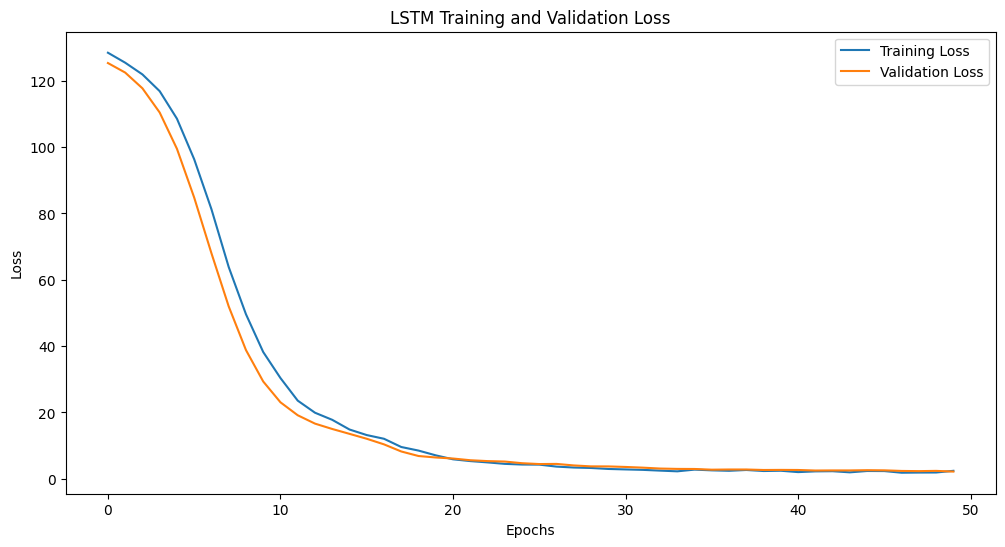

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training and Validation Loss')
plt.show()

**CNN**

In [51]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [52]:
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Regression output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [54]:
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 124.3272 - mae: 10.1353 - val_loss: 103.1887 - val_mae: 9.4682
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 89.7050 - mae: 8.6163 - val_loss: 54.1618 - val_mae: 6.6990
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 43.9305 - mae: 5.8356 - val_loss: 27.5513 - val_mae: 3.8242
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 38.2129 - mae: 4.6768 - val_loss: 23.0847 - val_mae: 3.5826
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 35.0688 - mae: 4.7030 - val_loss: 26.0005 - val_mae: 4.1898
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 29.9645 - mae: 4.4414 - val_loss: 22.5700 - val_mae: 3.7262
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 31.0271 - mae: 4.4348 - val_loss: 21.3336 - val_mae: 3.4361
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 27.8897 - mae: 3.9982 - val_loss: 20.5951 - val_mae: 3.4439
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 27.3

In [55]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

print(f"CNN Mean Squared Error (MSE): {mse_cnn:.4f}")
print(f"CNN Root Mean Squared Error (RMSE): {rmse_cnn:.4f}")
print(f"CNN R-squared: {r2_cnn:.4f}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
CNN Mean Squared Error (MSE): 7.3824
CNN Root Mean Squared Error (RMSE): 2.7171
CNN R-squared: 0.6400


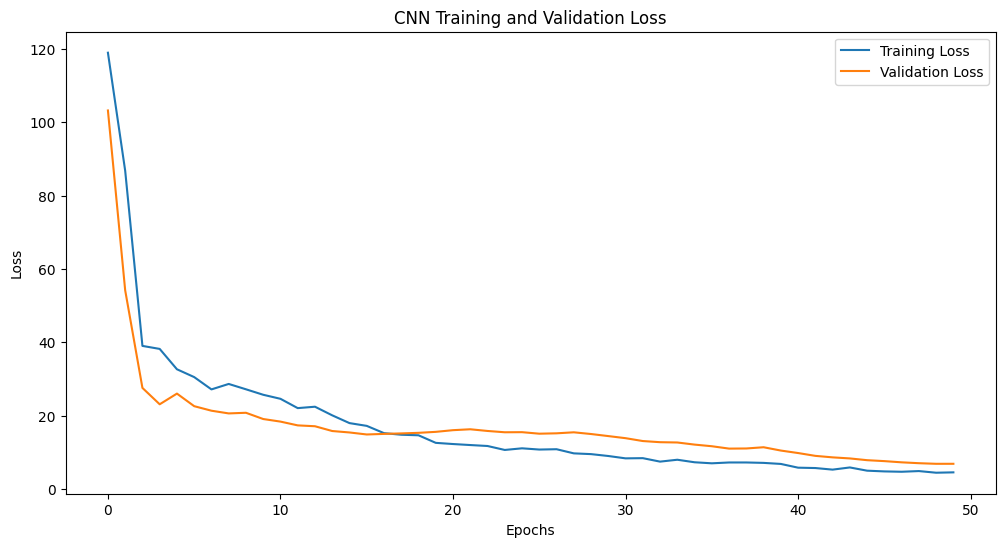

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Training and Validation Loss')
plt.show()

In [57]:
print("\nModel Performance Summary:")
# rmse lower is better and R2 higher is better
print(f"FNN - RMSE: {rmse_fnn:.4f}, R²: {r2_fnn:.4f}")
print(f"Decision Tree - RMSE: {rmse_dt:.4f}, R²: {r2_dt:.4f}")
print(f"Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"LSTM - RMSE: {rmse_lstm:.4f}, R²: {r2_lstm:.4f}")
print(f"CNN - RMSE: {rmse_cnn:.4f}, R²: {r2_cnn:.4f}")


Model Performance Summary:
FNN - RMSE: 2.2180, R²: 0.7601
Decision Tree - RMSE: 0.9209, R²: 0.9586
Random Forest - RMSE: 0.7035, R²: 0.9759
LSTM - RMSE: 2.0810, R²: 0.7888
CNN - RMSE: 2.7171, R²: 0.6400
